# Setup

In [1]:
import numpy as np
from typing import Tuple, Optional
import matplotlib.pyplot as plt

# Original Implementation

In [2]:
VOCAB_SIZE = 4096
N_SPECIAL_TOKENS = 2  # [PAD] and [EOS]
PAD_TOKEN_ID = 0
EOS_TOKEN_ID = 1


class MeanScaleUniformBins:
    def __init__(self, low_limit: float = -15.0, high_limit: float = 15.0) -> None:
        self.config = None
        self.centers = np.linspace(
            low_limit,
            high_limit,
            VOCAB_SIZE - N_SPECIAL_TOKENS - 1,
        )
        self.boundaries = np.concatenate(
            (
                np.array([-1e20]),
                (self.centers[1:] + self.centers[:-1]) / 2,
                np.array([1e20]),
            )
        )

    def _input_transform(
        self, context: np.ndarray, scale: Optional[np.ndarray] = None
    ) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
        attention_mask = ~np.isnan(context)

        if scale is None:
            scale = np.nansum(np.abs(context) * attention_mask, axis=-1) / np.nansum(
                attention_mask, axis=-1
            )
            scale[~(scale > 0)] = 1.0

        scaled_context = context / np.expand_dims(scale, axis=-1)
        token_ids = (
            np.digitize(
                scaled_context,
                bins=self.boundaries,
                right=True,
            )
            + N_SPECIAL_TOKENS
        )
        token_ids[~attention_mask] = PAD_TOKEN_ID

        return token_ids, attention_mask, scale

    def output_transform(self, samples: np.ndarray, scale: np.ndarray) -> np.ndarray:
        scale_unsqueezed = np.expand_dims(np.expand_dims(scale, -1), -1)
        indices = np.clip(
            samples - N_SPECIAL_TOKENS - 1,
            0,
            len(self.centers) - 1,
        )
        return self.centers[indices] * scale_unsqueezed

In [3]:
tokenizer = MeanScaleUniformBins()

Test input transform:

In [4]:
input_context = np.array(
    [
        [
            8032.0,
            9097.0,
            9394.0,
            8845.0,
            5619.0,
            3423.0,
            7764.0,
            10619.0,
            8299.0,
            4895.0,
            9619.0,
            10766.0,
            9680.0,
            8870.0,
            3445.0,
            4386.0,
            5861.0,
            5558.0,
            5391.0,
            5793.0,
            5190.0,
            5296.0,
            4059.0,
            2081.0,
            1845.0,
            1680.0,
            1746.0,
            1852.0,
            1833.0,
            1817.0,
            1634.0,
            1607.0,
            1789.0,
            1708.0,
            1683.0,
            1720.0,
            1623.0,
            1727.0,
            1710.0,
            1873.0,
            1854.0,
            1640.0,
            1667.0,
            1864.0,
            1602.0,
            1719.0,
            1762.0,
            1899.0,
            2109.0,
            2282.0,
            1928.0,
            1818.0,
            2194.0,
            1802.0,
            1835.0,
            1989.0,
            2119.0,
            3000.0,
            2599.0,
            2001.0,
            2379.0,
            1936.0,
            1877.0,
            1841.0,
            1919.0,
            1909.0,
            1803.0,
            1851.0,
            1861.0,
            2018.0,
            1914.0,
            2028.0,
            5488.0,
            7009.0,
            5430.0,
            3070.0,
            4339.0,
            1739.0,
            6760.0,
            3970.0,
            1740.0,
            1713.0,
            1048.0,
            1657.0,
            4582.0,
            10449.0,
            4199.0,
            7645.0,
            10510.0,
            10547.0,
            10120.0,
            11099.0,
            11474.0,
            9416.0,
            4925.0,
            4219.0,
            11362.0,
            11068.0,
            11701.0,
            11600.0,
            4049.0,
            1691.0,
            1914.0,
            1723.0,
            1711.0,
            1987.0,
            2179.0,
            1794.0,
            1974.0,
            1888.0,
            1999.0,
            1799.0,
            1887.0,
            1957.0,
            1842.0,
            1587.0,
            2655.0,
            2312.0,
            1923.0,
            1760.0,
            3447.0,
            1744.0,
            5771.0,
            3822.0,
            3677.0,
            1473.0,
            2911.0,
            1265.0,
            2047.0,
            1306.0,
            1626.0,
            2379.0,
            1430.0,
            1540.0,
            4747.0,
            8725.0,
            10975.0,
            10990.0,
            11456.0,
            10545.0,
            10813.0,
            3610.0,
            1328.0,
            1255.0,
            1596.0,
            1676.0,
            1319.0,
            1281.0,
        ],
        [
            18707.0,
            18116.0,
            17821.0,
            18191.0,
            17957.0,
            18227.0,
            18612.0,
            18885.0,
            18869.0,
            18315.0,
            18813.0,
            17514.0,
            18414.0,
            15572.0,
            12026.0,
            17435.0,
            17529.0,
            16287.0,
            15642.0,
            16515.0,
            19037.0,
            19532.0,
            18931.0,
            19041.0,
            19445.0,
            19901.0,
            20992.0,
            20799.0,
            21946.0,
            20495.0,
            21230.0,
            21327.0,
            19655.0,
            20358.0,
            19518.0,
            17372.0,
            16146.0,
            17501.0,
            13655.0,
            19669.0,
            18702.0,
            18461.0,
            17798.0,
            18149.0,
            17754.0,
            17725.0,
            19616.0,
            17481.0,
            18810.0,
            18711.0,
            18635.0,
            18854.0,
            18623.0,
            15952.0,
            17970.0,
            18749.0,
            18824.0,
            19193.0,
            18415.0,
            18026.0,
            19373.0,
            19811.0,
            19562.0,
            19130.0,
            15767.0,
            15735.0,
            15950.0,
            17295.0,
            19429.0,
            19768.0,
            21253.0,
            21083.0,
            21390.0,
            21502.0,
            21846.0,
            21870.0,
            21429.0,
            22912.0,
            24802.0,
            24719.0,
            24070.0,
            24333.0,
            24272.0,
            23541.0,
            22858.0,
            22211.0,
            22495.0,
            22188.0,
            22253.0,
            22539.0,
            20216.0,
            19511.0,
            20344.0,
            19781.0,
            19058.0,
            19167.0,
            18885.0,
            19027.0,
            18878.0,
            19147.0,
            19408.0,
            19086.0,
            18684.0,
            18598.0,
            18361.0,
            19396.0,
            19481.0,
            19786.0,
            19764.0,
            17648.0,
            18223.0,
            16814.0,
            15751.0,
            15737.0,
            16197.0,
            16529.0,
            15946.0,
            15564.0,
            16519.0,
            16053.0,
            16952.0,
            18274.0,
            17534.0,
            18094.0,
            16955.0,
            17471.0,
            17630.0,
            18271.0,
            18513.0,
            18963.0,
            19869.0,
            22188.0,
            23042.0,
            22639.0,
            22476.0,
            22575.0,
            22385.0,
            22695.0,
            20728.0,
            22158.0,
            20707.0,
            20330.0,
            18938.0,
            18668.0,
            17885.0,
            17283.0,
            17944.0,
            16862.0,
        ],
    ]
)

input_scale = np.array([ 4034.5405, 19144.7227])

original_token_ids, original_attention_mask, original_scale = tokenizer._input_transform(input_context, input_scale)

Test output transform:

In [5]:
output_scale = np.array(([4034.5405, 19144.7227]))
output_samples = np.array([[[2097, 2095, 2107, 2109, 2103, 2102, 2093, 2095],
         [2091, 2094, 2107, 2111, 2099, 2108, 2114, 2115],
         [2108, 2091, 2085, 2091, 2098, 2107, 2092, 2105],
         [2093, 2105, 2113, 2094, 2095, 2105, 2114, 2094],
         [2105, 2105, 2110, 2102, 2102, 2111, 2102, 2107],
         [2098, 2092, 2098, 2102, 2093, 2093, 2097, 2104],
         [2089, 2115, 2107, 2110, 2110, 2110, 2106, 2102],
         [2096, 2105, 2116, 2095, 2095, 2096, 2094, 2096],
         [2096, 2093, 2095, 2125, 2109, 2113, 2107, 2112],
         [2096, 2095, 2102, 2096, 2104, 2102, 2099, 2107],
         [2103, 2093, 2094, 2106, 2093, 2119, 2105, 2111],
         [2106, 2121, 2104, 2107, 2098, 2105, 2111, 2108],
         [2110, 2117, 2103, 2095, 2097, 2098, 2091, 2098],
         [2097, 2106, 2101, 2098, 2110, 2113, 2111, 2121],
         [2099, 2094, 2100, 2097, 2096, 2095, 2096, 2103],
         [2108, 2111, 2091, 2102, 2106, 2106, 2122, 2110],
         [2092, 2089, 2091, 2090, 2094, 2094, 2095, 2094],
         [2107, 2106, 2107, 2121, 2127, 2114, 2104, 2101],
         [2104, 2108, 2096, 2100, 2116, 2113, 2113, 2120],
         [2088, 2109, 2093, 2105, 2091, 2096, 2091, 2106]],

        [[2166, 2168, 2166, 2167, 2151, 2163, 2157, 2162],
         [2171, 2171, 2165, 2165, 2162, 2162, 2156, 2151],
         [2166, 2166, 2147, 2170, 2152, 2159, 2161, 2178],
         [2173, 2166, 2168, 2168, 2173, 2168, 2167, 2163],
         [2168, 2170, 2167, 2148, 2182, 2176, 2178, 2160],
         [2166, 2172, 2164, 2176, 2185, 2183, 2181, 2174],
         [2167, 2169, 2173, 2171, 2167, 2163, 2163, 2164],
         [2167, 2165, 2161, 2181, 2169, 2182, 2180, 2179],
         [2177, 2168, 2165, 2169, 2166, 2165, 2167, 2148],
         [2177, 2178, 2179, 2171, 2175, 2167, 2175, 2176],
         [2166, 2169, 2172, 2172, 2176, 2181, 2174, 2183],
         [2167, 2167, 2170, 2166, 2162, 2171, 2171, 2173],
         [2173, 2178, 2179, 2181, 2181, 2180, 2180, 2179],
         [2169, 2161, 2165, 2166, 2165, 2172, 2172, 2187],
         [2176, 2178, 2163, 2165, 2165, 2164, 2162, 2181],
         [2174, 2178, 2178, 2175, 2173, 2168, 2173, 2167],
         [2155, 2154, 2167, 2159, 2162, 2164, 2163, 2169],
         [2173, 2179, 2178, 2176, 2175, 2176, 2177, 2168],
         [2171, 2162, 2169, 2160, 2173, 2167, 2166, 2160],
         [2165, 2166, 2166, 2169, 2168, 2173, 2176, 2175]]])

original_output_transform = tokenizer.output_transform(output_samples, output_scale)

# Simplied Implementation

In [6]:
VOCAB_SIZE = 4096
N_SPECIAL_TOKENS = 2  # [PAD] and [EOS]
PAD_TOKEN_ID = 0
EOS_TOKEN_ID = 1

# Define the range for binning
LOW_LIMIT = -15.0
HIGH_LIMIT = 15.0

In [7]:
# Create bin centers
centers = np.linspace(LOW_LIMIT, HIGH_LIMIT, VOCAB_SIZE - N_SPECIAL_TOKENS - 1) # -1 is a bug?

# Create boundaries for binning
boundaries = np.concatenate(
    (
        np.array([-1e20]),  # To capture all lower values
        (centers[1:] + centers[:-1]) / 2,  # Midpoints between centers
        np.array([1e20]),  # To capture all higher values
    )
)

print(f"The lenght of boundaries is {len(boundaries)}")
print(f"The lenght of centers is {len(centers)}")

The lenght of boundaries is 4094
The lenght of centers is 4093


In [8]:
def mean_scale(context):
    attention_mask = ~np.isnan(context)  # Identify valid (non-NaN) values
    scale = np.nansum(np.abs(context) * attention_mask) / np.nansum(attention_mask)
    scale = max(scale, 1.0)  # Avoid division by zero or very small scales
    scaled_context = context / scale
    return scaled_context, scale, attention_mask


In [9]:
def tokenize(scaled_context, attention_mask):
    token_ids = np.digitize(scaled_context, bins=boundaries, right=True) + N_SPECIAL_TOKENS
    token_ids[~attention_mask] = PAD_TOKEN_ID  # Mark NaNs as PAD
    return token_ids


In [10]:
def detokenize(token_ids, scale):
    indices = np.clip(token_ids - N_SPECIAL_TOKENS - 1, 0, len(centers) - 1)
    scaled_values = centers[indices] * scale
    return scaled_values

In [11]:
# Example time series
time_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Step 1: Scale the time series
scaled_context, scale, attention_mask = mean_scale(time_series)

# Step 2: Tokenize the scaled time series
token_ids = tokenize(scaled_context, attention_mask)

# Step 3: Detokenize to get back to scaled values
reconstructed_values = detokenize(token_ids, scale)

print("Original Time Series:", time_series)
print("Scaled Context:", scaled_context)
print("Token IDs:", token_ids)
print("Reconstructed Values:", reconstructed_values)


Original Time Series: [ 1  2  3  4  5  6  7  8  9 10]
Scaled Context: [0.18181818 0.36363636 0.54545455 0.72727273 0.90909091 1.09090909
 1.27272727 1.45454545 1.63636364 1.81818182]
Token IDs: [2074 2099 2123 2148 2173 2198 2223 2247 2272 2297]
Reconstructed Values: [ 1.00806452  2.01612903  2.98387097  3.99193548  5.          6.00806452
  7.01612903  7.98387097  8.99193548 10.        ]


Test the simplied implementation against the original implementation:

In [12]:
x, y, z = mean_scale(input_context[0])
xx = tokenize(x, z)

assert np.array_equal(xx, original_token_ids[0]), "Arrays are not equal"

In [13]:
yy = detokenize(output_samples[0], output_scale[0])
assert np.allclose(yy, original_output_transform[0]), "Arrays are not equal"

# Walkthrough (Simplied Implementation)

In [14]:
# VOCAB_SIZE = 4096
VOCAB_SIZE = 10
N_SPECIAL_TOKENS = 2  # [PAD] and [EOS]
PAD_TOKEN_ID = 0
EOS_TOKEN_ID = 1

# Define the range for binning
LOW_LIMIT = -15.0
HIGH_LIMIT = 15.0

In [15]:
# Create bin centers
centers = np.linspace(LOW_LIMIT, HIGH_LIMIT, VOCAB_SIZE - N_SPECIAL_TOKENS)

# Create boundaries for binning
boundaries = np.concatenate(
    (
        np.array([-1e20]),  # To capture all lower values
        (centers[1:] + centers[:-1]) / 2,  # Midpoints between centers
        np.array([1e20]),  # To capture all higher values
    )
)

print(f"The length of boundaries is {len(boundaries)}")
print(f"The length of centers is {len(centers)}")

formatted_boundaries = [
    f"{b:.2e}" if i == 0 or i == len(boundaries) - 1 else f"{b:,.0f}"
    for i, b in enumerate(boundaries)
]
print(f"The boundaries are: [{', '.join(formatted_boundaries)}]")

print(f"The centers are {centers}")


The length of boundaries is 9
The length of centers is 8
The boundaries are: [-1.00e+20, -13, -9, -4, 0, 4, 9, 13, 1.00e+20]
The centers are [-15.         -10.71428571  -6.42857143  -2.14285714   2.14285714
   6.42857143  10.71428571  15.        ]


Visualize the bins:

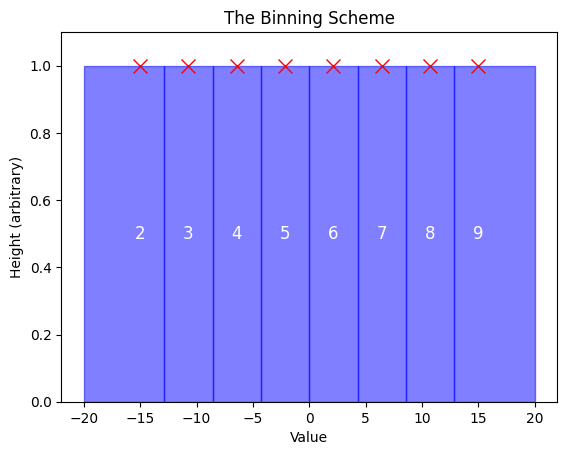

In [16]:
# Plotting the boundaries as vertical bars stopping at y=1
boundary_for_viz = boundaries.copy()
boundary_for_viz[0] = LOW_LIMIT - 5
boundary_for_viz[-1] = HIGH_LIMIT + 5

# Fill the area between the boundaries with blue rectangles
for i in range(len(boundary_for_viz) - 1):
    plt.fill_betweenx([0, 1], boundary_for_viz[i], boundary_for_viz[i + 1], color='blue', alpha=0.5)

# Plotting the centers as Xs at the top of each bar
for center in centers:
    plt.plot(center, 1, 'rx', markersize=10, label=f'Center {center}' if center == centers[0] else "")

# Adding text to denote the number of each center
for i, center in enumerate(centers, ):
    plt.text(center, 0.5, str(i + N_SPECIAL_TOKENS), ha='center', va='center', fontsize=12, color='white')


# Adding labels and grid
plt.title('The Binning Scheme')
plt.xlabel('Value')
plt.ylabel('Height (arbitrary)')
# plt.grid(True)
plt.ylim(0, 1.1)  # Adjust y-limit to give some space above the bars
plt.show()

In [17]:
# example context:
# context = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
context = np.array([-10, 5, 100]) 

In [18]:
def mean_scale(context):
    attention_mask = ~np.isnan(context)  # Identify valid (non-NaN) values
    scale = np.nansum(np.abs(context) * attention_mask) / np.nansum(attention_mask)
    scale = max(scale, 1.0)  # Avoid division by zero or very small scales
    scaled_context = context / scale
    return scaled_context, scale, attention_mask


scaled_context, scale, attention_mask = mean_scale(context)
print(f"Scaled Context: {scaled_context}")
print(f"Scale: {scale}")
print(f"Attention Mask: {attention_mask}")


Scaled Context: [-0.26086957  0.13043478  2.60869565]
Scale: 38.333333333333336
Attention Mask: [ True  True  True]


In [20]:
def tokenize(scaled_context, attention_mask):
    token_ids = np.digitize(scaled_context, bins=boundaries, right=True) + N_SPECIAL_TOKENS - 1 # -1 because  np.digitize starts from 1
    token_ids[~attention_mask] = PAD_TOKEN_ID  # Mark NaNs as PAD
    return token_ids


token_ids = tokenize(scaled_context, attention_mask)
print(f"Token IDs: {token_ids}")

Token IDs: [5 6 6]


In [21]:
def detokenize(token_ids, scale):
    indices = np.clip(token_ids - N_SPECIAL_TOKENS, 0, len(centers))
    scaled_values = centers[indices] * scale
    return scaled_values

reconstructed_values = detokenize(token_ids, scale)

print(f"Reconstructed Values: {reconstructed_values}")

Reconstructed Values: [-82.14285714  82.14285714  82.14285714]


In [22]:
predicted_token_ids = np.array([3, 5, 7])
predicted_values = detokenize(predicted_token_ids, scale)
print(f"Predicted Values: {predicted_values}")

Predicted Values: [-410.71428571  -82.14285714  246.42857143]


# Testing mean scale

In [23]:
# Scenario 1: High Variance with Extreme Outliers
# Expectation: The scaled value of the outlier will remain large relative to the others.
context1 = np.array([1, 2, 3, 1000000])
scaled_context1, scale1, mask1 = mean_scale(context1)

# Scenario 2: Small Non-Outlier Values Combined with a Large Mean
# Expectation: The large value might still be large after scaling, while small values are minimized.
context2 = np.array([0.1, 0.2, 100000])
scaled_context2, scale2, mask2 = mean_scale(context2)

# Scenario 3: All Values Are Large but Not Outliers
# Expectation: The values will be scaled down but might still remain large.
context3 = np.array([1000000, 2000000, 3000000])
scaled_context3, scale3, mask3 = mean_scale(context3)

# Scenario 4: Sequence Consists Only of Large Values (with No Small Values)
# Expectation: Scaling by the mean will reduce them, but they will still be relatively large.
context4 = np.array([500000, 600000, 700000])
scaled_context4, scale4, mask4 = mean_scale(context4)

# Print results
print("Scenario 1 - High Variance with Extreme Outliers:")
print("Original Context:", context1)
print("Scaled Context:", scaled_context1)
print("Scale:", scale1)
print()

print("Scenario 2 - Small Non-Outlier Values Combined with a Large Mean:")
print("Original Context:", context2)
print("Scaled Context:", scaled_context2)
print("Scale:", scale2)
print()

print("Scenario 3 - All Values Are Large but Not Outliers:")
print("Original Context:", context3)
print("Scaled Context:", scaled_context3)
print("Scale:", scale3)
print()

print("Scenario 4 - Sequence Consists Only of Large Values:")
print("Original Context:", context4)
print("Scaled Context:", scaled_context4)
print("Scale:", scale4)
print()

Scenario 1 - High Variance with Extreme Outliers:
Original Context: [      1       2       3 1000000]
Scaled Context: [3.9999760e-06 7.9999520e-06 1.1999928e-05 3.9999760e+00]
Scale: 250001.5

Scenario 2 - Small Non-Outlier Values Combined with a Large Mean:
Original Context: [1.e-01 2.e-01 1.e+05]
Scaled Context: [2.999991e-06 5.999982e-06 2.999991e+00]
Scale: 33333.433333333334

Scenario 3 - All Values Are Large but Not Outliers:
Original Context: [1000000 2000000 3000000]
Scaled Context: [0.5 1.  1.5]
Scale: 2000000.0

Scenario 4 - Sequence Consists Only of Large Values:
Original Context: [500000 600000 700000]
Scaled Context: [0.83333333 1.         1.16666667]
Scale: 600000.0



In [24]:
context5 = np.arange(1, 1001)
scaled_context5, scale5, mask5 = mean_scale(context5)

print("Scenario 5 - Long Sequence of Large Values:")
print("Original Context (first 10 values):", context5[:10])
print("Scaled Context (first 10 values):", scaled_context5[:10])
print("Scaled Context (last 10 values):", scaled_context5[-10:])
print("Scale:", scale5)
print()

Scenario 5 - Long Sequence of Large Values:
Original Context (first 10 values): [ 1  2  3  4  5  6  7  8  9 10]
Scaled Context (first 10 values): [0.001998   0.003996   0.00599401 0.00799201 0.00999001 0.01198801
 0.01398601 0.01598402 0.01798202 0.01998002]
Scaled Context (last 10 values): [1.98001998 1.98201798 1.98401598 1.98601399 1.98801199 1.99000999
 1.99200799 1.99400599 1.996004   1.998002  ]
Scale: 500.5



In [25]:
context6 = np.arange(1, 1001)  # A sequence from 1 to 1000

# Take the logarithm of the context before scaling
log_context6 = np.log(context5)

# Apply mean scaling to the log-transformed context
scaled_context6, scale6, mask6 = mean_scale(log_context6)

# Print results for the new scenario
print("Scenario 5 - Long Sequence of Large Values (Log-Transformed):")
print("Original Context (first 10 values):", context6[:10])
print("Log-Transformed Context (first 10 values):", log_context6[:10])
print("Scaled Context (first 10 values):", scaled_context6[:10])
print("Scaled Context (last 10 values):", scaled_context6[-10:])
print("Scale:", scale6)
print()

Scenario 5 - Long Sequence of Large Values (Log-Transformed):
Original Context (first 10 values): [ 1  2  3  4  5  6  7  8  9 10]
Log-Transformed Context (first 10 values): [0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154 2.19722458 2.30258509]
Scaled Context (first 10 values): [0.         0.11724157 0.18582349 0.23448314 0.27222649 0.30306506
 0.32913869 0.35172471 0.37164698 0.38946806]
Scaled Context (last 10 values): [1.16687499 1.16704559 1.16721601 1.16738626 1.16755634 1.16772625
 1.16789599 1.16806555 1.16823495 1.16840418]
Scale: 5.912128178488163



# How Text Generation Works 

In [26]:
from tabulate import tabulate

vocab = {0: "<PAD>", 1: "<UNK>", 2: "<EOS>", 3: "cat", 4: "is", 5: "on", 6: "the", 7: "mat", 8: "dog", 9: "The"}

table = []
for key, value in vocab.items():
    table.append([key, value])

print(tabulate(table, headers=["Token ID", "Token"]))


  Token ID  Token
----------  -------
         0  <PAD>
         1  <UNK>
         2  <EOS>
         3  cat
         4  is
         5  on
         6  the
         7  mat
         8  dog
         9  The


In [27]:
input_sentence = "The cat is on"

word_to_token_id = {word: token_id for token_id, word in vocab.items()}

input_token_ids = [word_to_token_id.get(word) for word in input_sentence.split()]

input_token_ids

[9, 3, 4, 5]

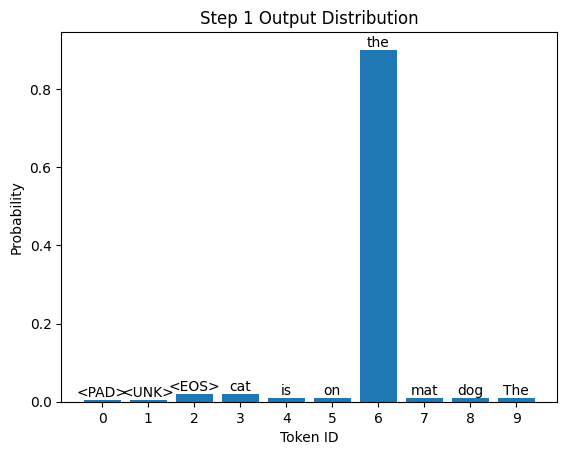

In [28]:
step_1_output_distribution = [0.005, 0.005, 0.02, 0.02, 0.01, 0.01, 0.90, 0.01, 0.01, 0.01]

indices = np.arange(len(step_1_output_distribution))
plt.bar(indices, step_1_output_distribution)

# Set labels for each tick under each bar
plt.xticks(indices, [str(i) for i in indices])

# Write texts on top of each bar
for i, value in enumerate(step_1_output_distribution):
    plt.text(i, value, vocab[i], ha='center', va='bottom')


# Set labels and title
plt.xlabel('Token ID')
plt.ylabel('Probability')
plt.title('Step 1 Output Distribution')


# Show the plot
plt.show()

In [29]:
step_1_predicted_token_id = np.argmax(step_1_output_distribution)
step_1_predicted_word = vocab[step_1_predicted_token_id]

step_2_input_sentence = input_sentence + " " + step_1_predicted_word
step_2_input_sentence

'The cat is on the'

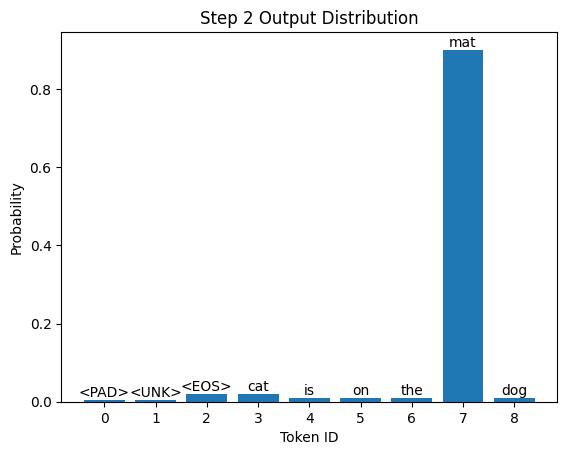

In [30]:
step_2_output_distribution = [0.005, 0.005, 0.02, 0.02, 0.01, 0.01, 0.01, 0.90, 0.01]

indices = np.arange(len(step_2_output_distribution))
plt.bar(indices, step_2_output_distribution)

# Set labels for each tick under each bar
plt.xticks(indices, [str(i) for i in indices])

# Write texts on top of each bar
for i, value in enumerate(step_2_output_distribution):
    plt.text(i, value, vocab[i], ha='center', va='bottom')


# Set labels and title
plt.xlabel('Token ID')
plt.ylabel('Probability')
plt.title('Step 2 Output Distribution')


# Show the plot
plt.show()

In [31]:
step_2_predicted_token_id = np.argmax(step_2_output_distribution)
step_2_predicted_word = vocab[step_2_predicted_token_id]

step_3_input_sentence = step_2_input_sentence + " " + step_2_predicted_word
step_3_input_sentence

'The cat is on the mat'

# Scratch